# Relatório de Análise VIII

## Indentificando e Removendo Outliers

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (14,6))

In [2]:
dados = pd.read_csv('aluguel_residencial.csv', sep = ';')

In [3]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
19826,Quitinete,Glória,1,0,0,10,400.0,107.0,10.0,40.00,Apartamento
19827,Quitinete,Flamengo,1,0,0,23,900.0,605.0,0.0,39.13,Apartamento
19828,Quitinete,Centro,1,0,0,24,1100.0,323.0,0.0,45.83,Apartamento
19829,Quitinete,Copacabana,1,0,0,22,1500.0,286.0,200.0,68.18,Apartamento


<AxesSubplot:>

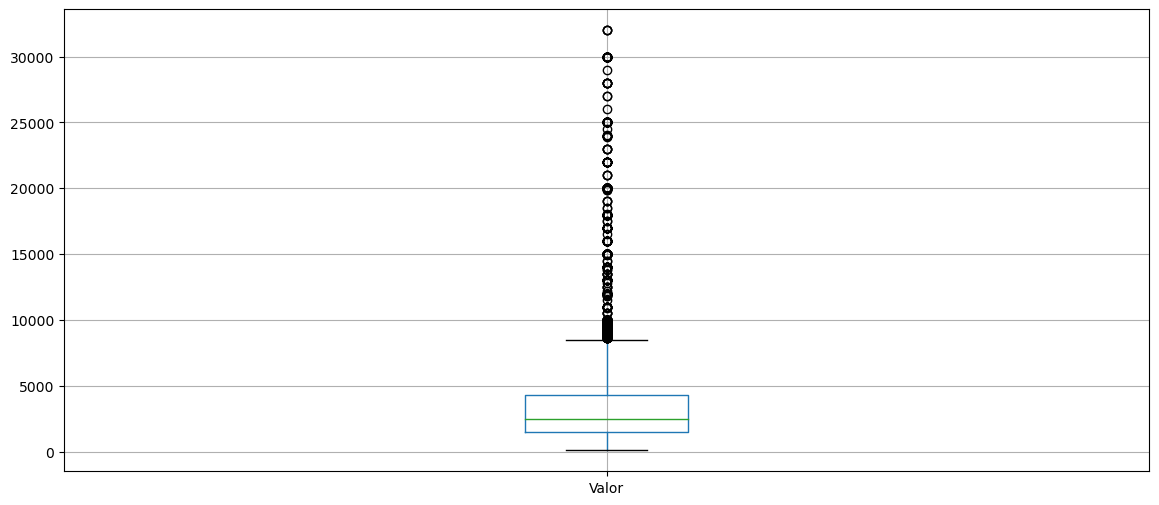

In [4]:
dados.boxplot(['Valor'])

In [5]:
dados[dados['Valor'] >= 500000]


,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado


In [6]:
valor = dados['Valor']

In [8]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ



In [9]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

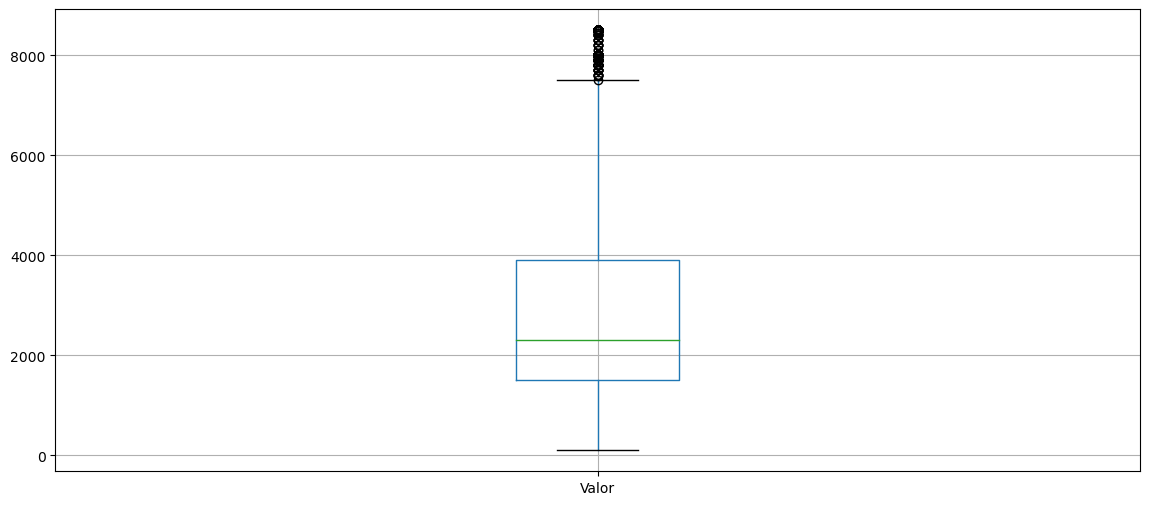

In [10]:
dados_new.boxplot(['Valor'])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

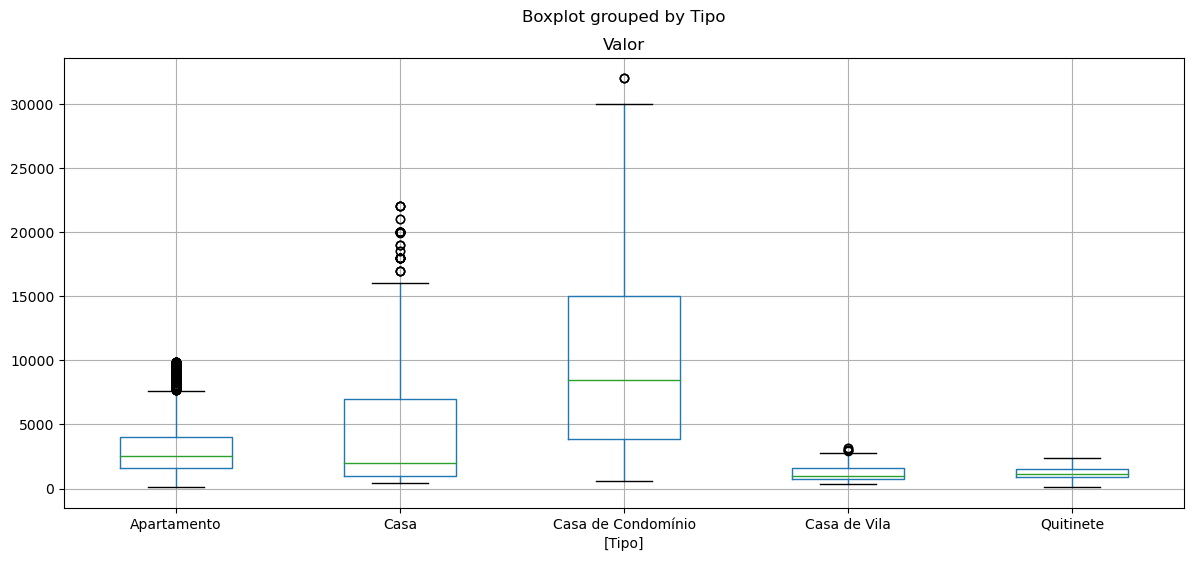

In [11]:
dados.boxplot(['Valor'], by = ['Tipo'])

In [14]:
grupo_tipo = dados.groupby('Tipo')['Valor']

In [13]:
type(grupo_tipo)

pandas.core.groupby.generic.DataFrameGroupBy

In [15]:
grupo_tipo.groups

{'Apartamento': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], 'Casa': [16923, 16924, 16925, 16926, 16927, 16928, 16929, 16930, 16931, 16932, 16933, 16934, 16935, 16936, 16937, 16938, 16939, 16940, 16941, 16942, 16943, 16944, 16945, 16946, 16947, 16948, 16949, 16950, 16951, 16952, 16953, 16954, 16955, 16956, 16957, 16958, 16959, 16960, 16961, 16962, 16963, 16964, 16965, 16966, 16967, 16968, 16969, 16970, 16971, 16972, 16973, 16974, 16975, 16976, 16977, 16978, 16979, 16980, 16981, 16982, 16983, 16984, 16985, 16986, 16987, 16988, 16989, 16990, 16991, 16992, 16993, 16994, 16995, 16996, 16997, 16998, 16999, 17000, 17001, 17002, 17003, 17004, 1700

In [16]:
Q1 =  grupo_tipo.quantile(.25)
Q3 =  grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [17]:
limite_superior['Apartamento']

7600.0

In [19]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

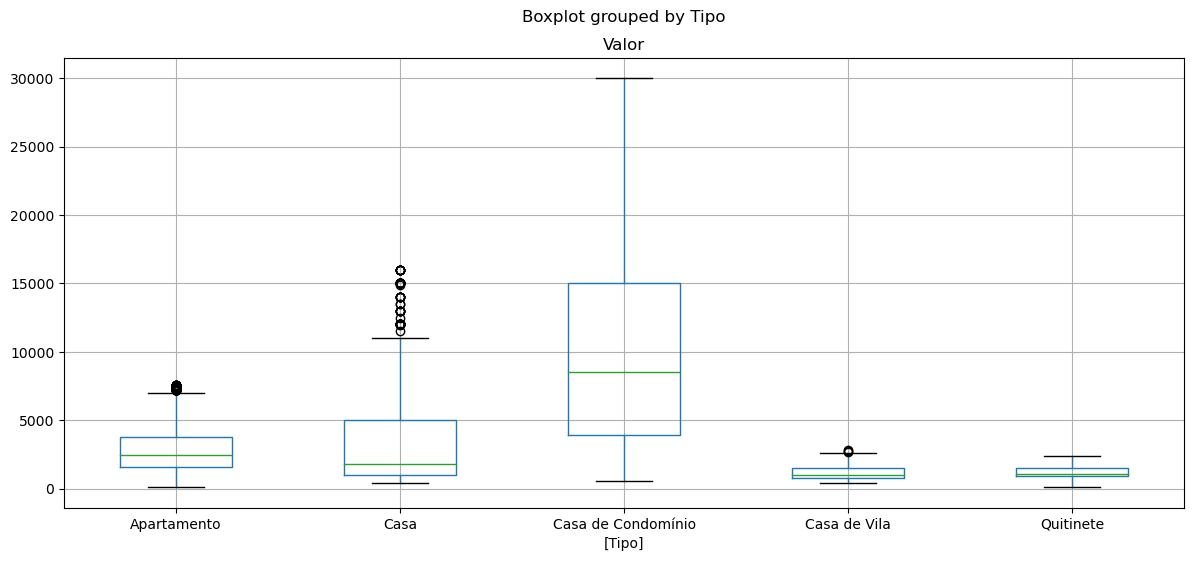

In [20]:
dados_new.boxplot(['Valor'], by = ['Tipo'])

In [22]:
dados_new.to_csv('aluguel_residencial_sem_outliers.csv', sep = ';', index = False)